In [1]:
# Imports
import IPython
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot

In [2]:
# Read the files from GitHub.
''' The data_url is the data that was modified. '''
    
data_url = 'https://raw.githubusercontent.com/VS-Coder/Lambda-School/master/Mod_Data.csv'

spot_df = pd.read_csv(data_url, na_values="?")

In [3]:
# drop duplicate column genres.
spot_df.drop(['genres', 'Unnamed: 0'], axis=1, inplace=True)

In [4]:
# Checking for null valules.
spot_df.isna().sum()

artists             393
acousticness        393
danceability        393
duration_ms         393
energy              393
instrumentalness    393
liveness            393
loudness            393
speechiness         393
tempo               393
valence             393
popularity          393
key                   0
mode                393
count               393
fixed_genres          0
dtype: int64

In [5]:
# Dropping the null values.
spot_df = spot_df.dropna()

In [6]:
# Checking that the null values(0) were dropped.
spot_df.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
fixed_genres        0
dtype: int64

In [28]:
# Defining the target and features.
target = 'popularity'
features = ['valence', 'energy', 'tempo','acousticness','liveness','loudness','speechiness']

In [29]:
# Dispaly the columns of the dataset.
spot_df.columns


Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count', 'fixed_genres'],
      dtype='object')

In [30]:
# Split the data.
from sklearn.model_selection import train_test_split
train, test = train_test_split(spot_df, train_size=0.70, test_size=0.30, random_state=42)

In [31]:
train, val = train_test_split(train, train_size=0.70, test_size=0.30, random_state=42)

In [32]:
# Establish the pipeline. Use the mean as the baseline.
# This is a tree-based model. 
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    RandomForestRegressor(random_state=42, n_jobs=1)
)

# Make the test, train, and val matrixes.
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]

# Fit on train, score on val.
# Get accuracy score.
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

C:\Users\Owner\.conda\envs\unit2\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



Validation Accuracy 0.618256477620861


In [40]:
# For linear Regression drop only the target.
features = spot_df.drop(target, axis=1)

In [41]:
# Displaying the columns
features.columns

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key', 'mode', 'count', 'fixed_genres'],
      dtype='object')

In [46]:
# Linaer Regression model. Prediction and scoring also included here.
from sklearn.linear_model import LinearRegression

pline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LinearRegression(n_jobs=-1)
)
# Fit on train
pline.fit(X_train, y_train)

# Score on validation
print ('Validation Accruacy', pline.score(X_val, y_val))

# Predict on test
y_pred = pline.predict(X_test)


Validation Accruacy 0.40819994952064376


C:\Users\Owner\.conda\envs\unit2\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



# 

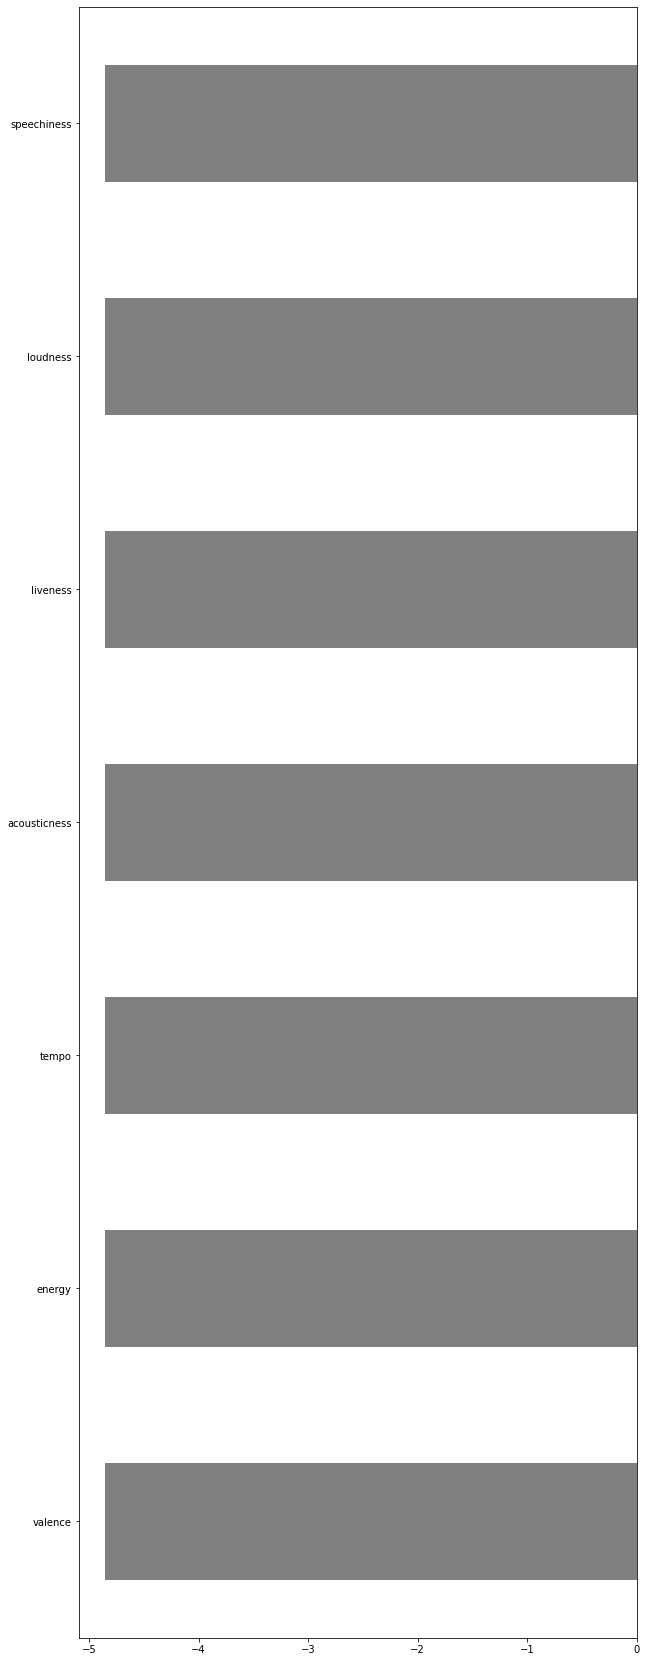

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pline.named_steps['linearregression']
encoder = pline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');